Author: Pierce Rotman

Professor: Pashaie

Course: CAP 6673

Date: 28 September 2023

Project 3

1. First, we create an SVM using a linear kernel to classify the data in SVM_data.mat. We then visualize the data and classifier.

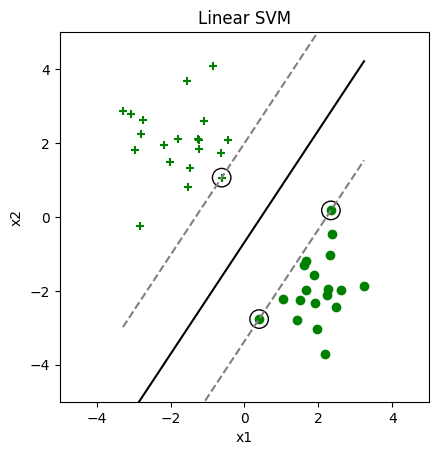

In [24]:
"""
Author: Pierce Rotman
Professor: Pashaie
Course: CAP 6673
Date: 28 September 2023
Creates a linear SVM and an SVM with a polynomial kernel for nonlinear data.
"""

#imports
import numpy as np
import scipy
import matplotlib.pyplot as plt


#Load Data
svm_data = scipy.io.loadmat(\
    '/Users/piercerotman/Documents/MastersProgram/'
    'Machine_Learning/SVM_data.mat')
X = np.array(svm_data['x'])
Y = np.array(svm_data['y'])

#Get data dimensions
m = X[:,0].size
midm = int(m/2)
n = X[1,:].size

#Create variables and Q matrix
alphas = np.zeros(m)
ones = np.ones(m)
Q = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        Q[i,j] = Q[i,j] = Y[i,:]*Y[j,:]*X[i,:].dot(X[j,:])


#Set up KKT conditions
constraints = {'type': 'eq', 'fun': lambda alphas: \
               Y.transpose().dot(alphas)}
def function(alphas):
    """
    Generates lagrangian for alpha vector
    Args:
        alphas (numpy.ndarray): alphas vector
    Returns:
        (float): lagrangian
    """
    return 0.5 * alphas.transpose().dot(Q).dot(alphas)\
    - ones.transpose().dot(alphas)


#Optimize alphas and identify support vectors
minimization = scipy.optimize.minimize(function, alphas, \
                                       constraints = constraints, \
                                       bounds = [(0, 1) for i in range(m)])
optimized_alphas = minimization.x
sv_indices = np.where(optimized_alphas >= 0.001)[0]
support_vectors = X[sv_indices,:]

#Calculate W
W = np.zeros((2,1))
for i in range(m):
    W[0] += optimized_alphas[i] * Y[i,0] * X[i,0]
    W[1] += optimized_alphas[i] * Y[i,0] * X[i,1]

#calculate b
b = (1 / Y[sv_indices[0]]) - W.transpose().dot(support_vectors[0,:])

fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.scatter(x = X[0:midm, 0], y = X[0:midm, 1], \
            marker = "+", color = 'green')
plt.scatter(x = X[midm+1:m, 0], y = X[midm+1:m, 1], \
            marker = 'o', color = 'green')
ax.set_aspect('equal')
for sv in support_vectors:
    circle = plt.Circle(xy=(sv[0], sv[1]), radius=0.25, \
                        color='black', fill=False)
    ax.add_patch(circle)
xvals = np.linspace(min(X[:,0]), max(X[:,0]), 50)
boundary = -(W[0]*xvals + b)/W[1]
margin1 = (1-(W[0]*xvals + b))/W[1]
margin2 = (-1-(W[0]*xvals + b))/W[1]
plt.plot(xvals, boundary, color = 'black')
plt.plot(xvals, margin1, linestyle = '--', color = 'gray')
plt.plot(xvals, margin2, linestyle = '--', color = 'gray')
plt.title("Linear SVM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

We see that the data is indeed linearly separable. There are three support vectors, as circled above. The solid line is the decision line, and the dotted lines are the margins. 

2. Next, we use a 3rd order polynomial kernel to separate the data in SVM_data_nonlinear.mat. We then visualize the classifier using a contour plot.

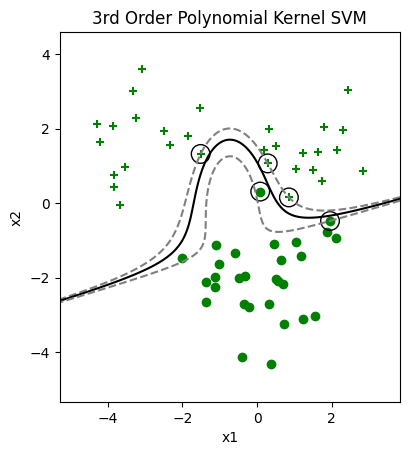

In [25]:
#Load Data
svm_data = scipy.io.loadmat(\
    '/Users/piercerotman/Documents/MastersProgram/'
    'Machine_Learning/SVM_data_nonlinear.mat')
X = np.array(svm_data['x'])
Y = np.array(svm_data['y'])

#Get data dimensions
m = X[:,0].size
midm = int(m/2)
n = X[1,:].size



def poly(x1, x2, order):
    """
    Calculates polynomial kernel for two vectors of X, given order
    Args:
        x1 (numpy.ndarray): value1
        x2 (numpy.ndarray): value2
        order (int): order of polynomial
    Returns:
        (float) poly of x1, x2
    """
    return (1 + np.dot(x1, x2)) ** order



#Create variable and Q matrix
alphas = np.zeros(m)
ones = np.ones(m)
Q = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        Q[i,j] = Y[i,:]*Y[j,:]*poly(X[i,:],X[j,:], 3)



#Set up KKT conditions
constraints = {'type': 'eq', 'fun': lambda alphas: \
               Y.transpose().dot(alphas)}
def function(alphas):
    return 0.5 * alphas.transpose().dot(Q).dot(alphas)\
    - ones.transpose().dot(alphas)


#Optimize
minimization = scipy.optimize.minimize(function, alphas, \
                                       constraints = constraints,\
                                       bounds = [(0, 1) for i in range(m)])
optimized_alphas = minimization.x
sv_indices = np.where(optimized_alphas > 0.001)[0]

#find b:
def decision_boundary(x):
    """
    Calculates decision function
    Args:
        x (numpy.ndarray): value to calculate decision function for
    Returns:
        (float) decision function value
    """
    return sum([optimized_alphas[i] * Y[i,:][0]\
                * poly(X[i,:], x, 3) for i in sv_indices])


b = - 1 - decision_boundary(X[sv_indices[0],:])

wrong = []
for i in range(m):
    if np.sign(decision_boundary(X[i,:]) + b) != Y[i,0]:
        wrong.append(i)


#Visualize decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max()+1
y_min, y_max = X[:,1].min() - 1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), \
                     np.arange(y_min, y_max, 0.01))

DB = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        boundary = decision_boundary([xx[i,j], yy[i,j]]) + b
        DB[i,j] = boundary 


fig, ax = plt.subplots()
plt.contour(xx, yy, DB, levels = [-1,0,1], \
            linestyles = ['--', '-', '--'], \
            colors = ['gray', 'black', 'gray'])
plt.scatter(x = X[0:midm,0], y = X[0:midm,1],\
            marker = '+', color = 'green')
plt.scatter(x = X[midm+1:m, 0], y = X[midm+1:m, 1],\
            marker = 'o', color = 'green')
ax.set_aspect('equal')
for i in sv_indices:
    circle = plt.Circle(xy=(X[i,0], X[i,1]), \
                        radius=0.25, color='black', fill=False)
    ax.add_patch(circle)
for i in wrong:
    circle = plt.Circle(xy=(X[i,0], X[i,1]), \
                        radius=0.3, color='red', fill=False)
    ax.add_patch(circle)    
plt.title("3rd Order Polynomial Kernel SVM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

We have 5 support vectors, as circled above. The decision line is shown as a solid line, and the margins are dotted lines. The boundary is not consistently spaced from the margins because we have plotted the contour in the X-space, while the data were separated in the Z-space. Additionally, the data were tested to ensure that every point is correctly identified.